Name : Anastasia Jocelyn Hilman
NIM : 2602073031

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import datasetnya, lalu sebelum melakukan proses preprocessing yang lebih lanjut, kita perlu melihat gambaran data terlebih dahulu secara umumnya, dengan head dan info

In [139]:
df = pd.read_csv("data_B.csv")
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,37969,15780804,Ugorji,850.0,France,Male,42.0,5,0.00,2,1,1,105560.01,0
1,1,121427,15593974,Dickson,597.0,Germany,Male,46.0,9,112291.06,2,1,1,47410.06,0
2,2,151801,15655274,Teng,637.0,Germany,Male,35.0,3,145974.79,2,1,0,180934.67,0
3,3,149981,15645404,McWilliams,695.0,France,Male,39.0,8,0.00,1,1,0,162669.73,0
4,4,115198,15625881,Yobachi,695.0,France,Female,29.0,0,109109.89,1,1,0,120770.80,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


Dari gambaran diatas, ada beberapa data yang dapat di drop karena tidak akan mempengaruhi proses preprocessing nantinya, seperti id dan customerId (yang harusnya bersifat unik tidak ada pattern), surname, dan unnamed: 0 yang terlihat seperti indexing data

In [141]:
clean_df = df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1)

In [142]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


Setelah drop, check missing value karena jika dilihat sekilas, jumlah data pada CreditScore ada kurang

In [143]:
clean_df.isna().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Jumlah data yang missing sangat sedikit dibandingkan dengan jumlah keseluruhan data CreditScore, missing 8, total 41251. Jadi, missing value akan di drop karena tidak memberikan perubahan yang besar terhadap keseluruhan data

In [144]:
clean_df.dropna(inplace=True)

In [145]:
clean_df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

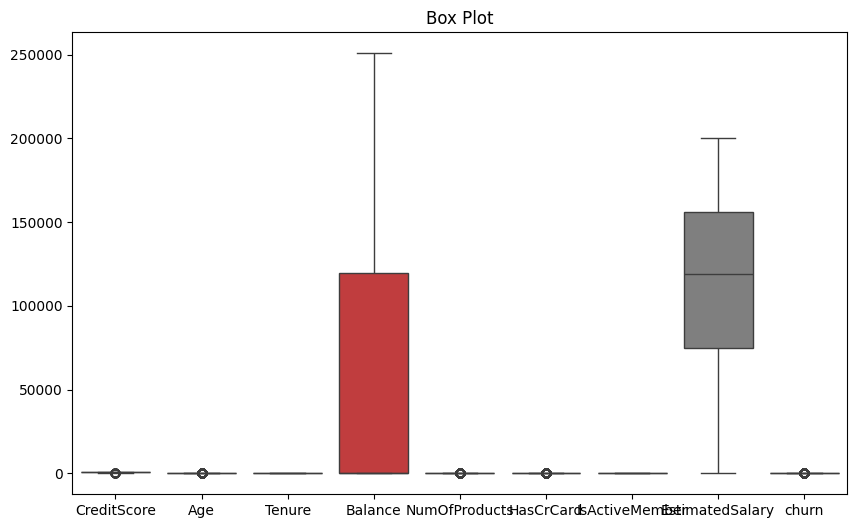

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df)
plt.title('Box Plot')
plt.show()

Dari boxplot diatas, terlihat bahwa outlier tidak terlalu banyak dan tidak berpengaruh, maka abaikan
dari data diatas juga didapatkan data apa saja yang termasuk numeric. 
Untuk mengeksplor plot lain seperti heatmap, data tidak boleh bersifat categorical (string, dll) jadi pisahkan terlebih dahulu

In [147]:
df_num = clean_df.select_dtypes(['float64', 'int64']).columns

<Axes: >

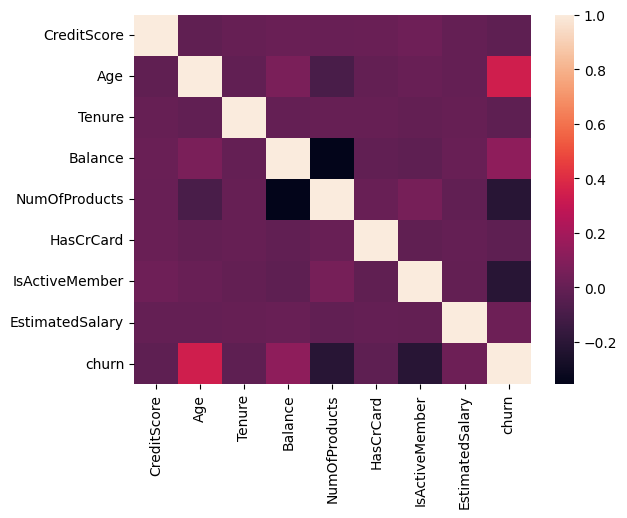

In [148]:

sns.heatmap(clean_df[df_num].corr())

In [150]:
clean_df[df_num].corr()['churn'].sort_values(ascending=False)

churn              1.000000
Age                0.340709
Balance            0.129276
EstimatedSalary    0.020637
Tenure            -0.022598
CreditScore       -0.025030
HasCrCard         -0.025658
IsActiveMember    -0.209158
NumOfProducts     -0.212093
Name: churn, dtype: float64

Dari heatmap dan juga summary correlation berdasarkan value churn diatas dapat dilihat bahwa ungu - hitam = korelasi rendah, merah - putih = ada kolerasi
maka secara keseluruhan, kolerasi terlihat lemah, bahkan hampir ada yang tidak berkolerasi sama sekali, namun ada 1 yaitu age dengan churn yang lumayan mempunyai kolerasi

Lalu pada summary churn dapat dilihat bahwa variabel age memiliki value yang paling mendekati 0.5 menandakan bahwa value age kemungkinan berpengaruh lebih besar, dilanjutkan dengan variabel balance

Setelah melihat data numerical, selanjutnya akan menganalisis data categorical

In [153]:
df_cat = clean_df.drop(df_num, axis=1).columns

In [154]:
clean_df[df_cat].head()

,Geography,Gender
0,France,Male
1,Germany,Male
2,Germany,Male
3,France,Male
4,France,Female


Ada 2 data categorical yaitu Geography & Gender, lalu liat unique value masing - masing

In [155]:
clean_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [156]:
clean_df['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

Mulai masuk ke bagian train & test. sebelum itu, split data dan hapus hasil prediksi 'churn' yang nantinya akan diinput, dan membuat outputnya prediksi 'churn'

In [157]:
input_df = clean_df.drop(['churn'], axis=1)
output_df = clean_df['churn']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [159]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2)

In [160]:
for col in df_cat: 
    df_encode = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    #Fit and transform 'Gender' for each dataframe
    encoded_train = df_encode.fit_transform(x_train[[col]])
    encoded_test = df_encode.transform(x_test[[col]])
    drop_col = [col]

    #reset indices, before concatenation
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)

    x_train = pd.concat([x_train.drop(columns=drop_col), pd.DataFrame(encoded_train, columns=df_encode.get_feature_names_out(drop_col))], axis=1)
    x_test = pd.concat([x_test.drop(columns=drop_col), pd.DataFrame(encoded_test, columns=df_encode.get_feature_names_out(drop_col))], axis=1)

In [161]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
RF_Class = RandomForestClassifier(criterion='gini', max_depth=4)
RF_Class.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [169]:
y_predRF =  RF_Class.predict(x_test)

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nClassification Report\n")
print(classification_report(y_test,y_predRF,target_names=['0','1']))
accuracyRF = accuracy_score(y_test, y_predRF)
print('Random Forest Accuracy:', accuracyRF)
precisionRF = precision_score(y_test, y_predRF)
print('Random Forest Precision:', precisionRF)
recallRF = recall_score(y_test, y_pred)
print('Random Forest Recall:', recallRF)
f1RF = f1_score(y_test, y_predRF)
print('Random Forest f1 score:', f1RF)



Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6499
           1       0.80      0.29      0.43      1752

    accuracy                           0.83      8251
   macro avg       0.82      0.64      0.67      8251
weighted avg       0.83      0.83      0.80      8251

Random Forest Accuracy: 0.8339595200581748
Random Forest Precision: 0.7984375
Random Forest Recall: 0.2916666666666667
Random Forest f1 score: 0.42725752508361203


In [171]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
y_predXGB = XGB.predict(x_test)

In [175]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nClassification Report\n")
print(classification_report(y_test,y_predXGB,target_names=['0','1']))
accuracyXGB = accuracy_score(y_test, y_predXGB)
print('XGBoost Accuracy:', accuracyXGB)
precisionXGB = precision_score(y_test, y_predXGB)
print('XGBoost Precision:', precisionXGB)
recallXGB = recall_score(y_test, y_predXGB)
print('XGBoost Recall:', recallXGB)
f1RF = f1_score(y_test, y_predXGB)
print('XGBoost f1 score:', f1XGB)


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6499
           1       0.72      0.55      0.62      1752

    accuracy                           0.86      8251
   macro avg       0.80      0.75      0.77      8251
weighted avg       0.85      0.86      0.85      8251

XGBoost Accuracy: 0.8590473881953703
XGBoost Precision: 0.7209302325581395
XGBoost Recall: 0.5485159817351598
XGBoost f1 score: 0.6133158412594293


In [181]:
print("Comparison Random Forest VS XGBoost")
print("========== Random Forest ==========")
print("Accuracy:  ", accuracyRF)
print("Precision: ", precisionRF)
print("Recall:    ", recallRF)
print("F1-Score:  ", f1RF)
print("============= XGBoost =============")
print("Accuracy:  ", accuracyXGB)
print("Precision: ", precisionXGB)
print("Recall:    ", recallXGB)
print("F1-Score:  ", f1XGB)

Comparison Random Forest VS XGBoost
========== Random Forest ==========
Accuracy:   0.8339595200581748
Precision:  0.7984375
Recall:     0.2916666666666667
F1-Score:   0.6230145867098865
============= XGBoost =============
Accuracy:   0.8590473881953703
Precision:  0.7209302325581395
Recall:     0.5485159817351598
F1-Score:   0.6133158412594293


dari hasil diatas, dapat disimpulkan bahwa XGBoost lebih baik dibandingkan dengan Random Forest karena walaupun hasil precision dan juga F1-score lebih tinggi RF, accuracy dan juga recall dimenangkan oleh XGBoost, pada XGboost juga tingkat recall lebih meningkat pesat, maka yang akan dipickle adalah XGBoost

In [124]:
import pickle

In [137]:
import pickle
from xgboost import XGBClassifier

# Create XGBoost classifier
model = XGBClassifier( 
    n_estimators=150,
    max_depth=7,
    learning_rate=0.1,
    gamma=0.4,
    colsample_bytree=0.8
)

# Train the model
model.fit(x_train, y_train)

# Export the model to a pickle file
filename = 'XGBoost_Model.pkl'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.8630469034056478
